In [1]:
import pandas as pd
heart_df = pd.read_csv("./data/SAheart.data")

In [2]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
row.names    462 non-null int64
sbp          462 non-null int64
tobacco      462 non-null float64
ldl          462 non-null float64
adiposity    462 non-null float64
famhist      462 non-null object
typea        462 non-null int64
obesity      462 non-null float64
alcohol      462 non-null float64
age          462 non-null int64
chd          462 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


In [3]:
heart_df.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [4]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.distplot(heart_df[heart_df['chd'] == 1].sbp, label="heart patient")
sn.distplot(heart_df[heart_df['chd'] == 0].sbp, label="non heart patient")
plt.legend();

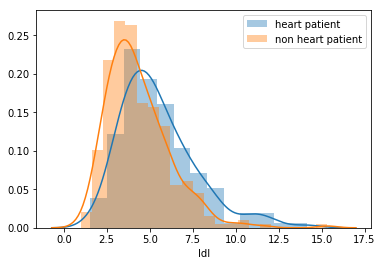

In [5]:
sn.distplot(heart_df[heart_df['chd'] == 1].ldl, label="heart patient")
sn.distplot(heart_df[heart_df['chd'] == 0].ldl, label="non heart patient")
plt.legend();

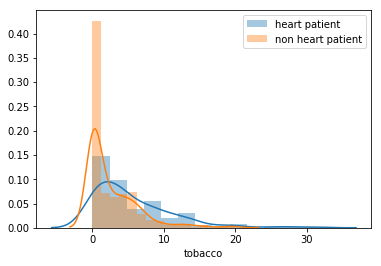

In [6]:
sn.distplot(heart_df[heart_df['chd'] == 1].tobacco, label="heart patient")
sn.distplot(heart_df[heart_df['chd'] == 0].tobacco, label="non heart patient")
plt.legend();

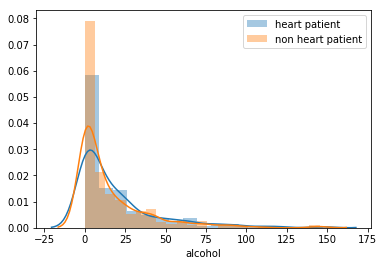

In [7]:
sn.distplot(heart_df[heart_df['chd'] == 1].alcohol, label="heart patient")
sn.distplot(heart_df[heart_df['chd'] == 0].alcohol, label="non heart patient")
plt.legend();

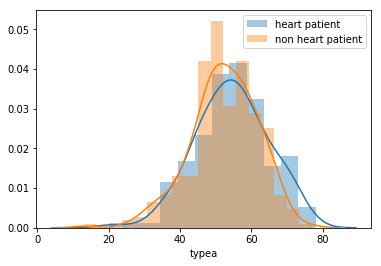

In [8]:
sn.distplot(heart_df[heart_df['chd'] == 1].typea, label="heart patient")
sn.distplot(heart_df[heart_df['chd'] == 0].typea, label="non heart patient")
plt.legend();

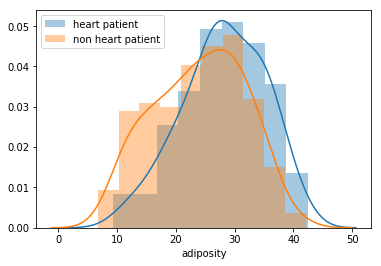

In [9]:
sn.distplot(heart_df[heart_df['chd'] == 1].adiposity, label="heart patient")
sn.distplot(heart_df[heart_df['chd'] == 0].adiposity, label="non heart patient")
plt.legend();

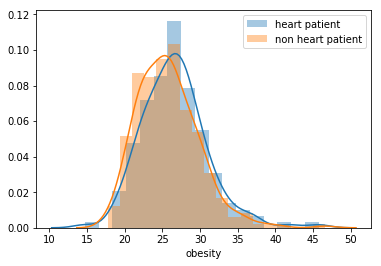

In [10]:
sn.distplot(heart_df[heart_df['chd'] == 1].obesity, label="heart patient")
sn.distplot(heart_df[heart_df['chd'] == 0].obesity, label="non heart patient")
plt.legend();

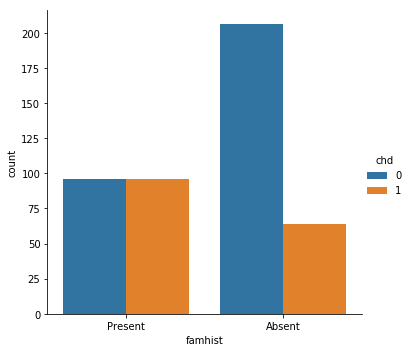

In [11]:
sn.catplot(
    data=heart_df,
    x = 'famhist',
    kind = 'count',
    hue = 'chd'
);

In [12]:
heart_encoded_df = heart_df.replace("Present", 1)
heart_encoded_df = heart_encoded_df.replace("Absent", 0)

In [13]:
heart_encoded_df = heart_encoded_df.drop("row.names", axis=1)
heart_encoded_df = heart_encoded_df.drop("alcohol", axis=1)
heart_encoded_df = heart_encoded_df.drop("typea", axis=1)
#sn.heatmap(heart_encoded_df.corr(), annot = True, cmap=sn.diverging_palette(10, 240, n=9));
heart_encoded_df.corr()
#sn.pairplot(heart_encoded_df);

,sbp,tobacco,ldl,adiposity,famhist,obesity,age,chd
sbp,1.000000,0.212247,0.158296,0.356500,0.085645,0.238067,0.388771,0.192354
tobacco,0.212247,1.000000,0.158905,0.286640,0.088601,0.124529,0.450330,0.299718
ldl,0.158296,0.158905,1.000000,0.440432,0.161353,0.330506,0.311799,0.263053
adiposity,0.356500,0.286640,0.440432,1.000000,0.181721,0.716556,0.625954,0.254121
famhist,0.085645,0.088601,0.161353,0.181721,1.000000,0.115595,0.239667,0.272373
obesity,0.238067,0.124529,0.330506,0.716556,0.115595,1.000000,0.291777,0.100095
age,0.388771,0.450330,0.311799,0.625954,0.239667,0.291777,1.000000,0.372973
chd,0.192354,0.299718,0.263053,0.254121,0.272373,0.100095,0.372973,1.000000


In [14]:
x_features = list(heart_encoded_df.columns)

In [15]:
x_features.remove("chd")

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(
    heart_encoded_df[x_features], 
    heart_encoded_df.chd, 
    train_size=0.8
)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [17]:
x_train.shape

(369, 7)

In [18]:
from sklearn.model_selection import cross_val_score

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
tree_v1 = DecisionTreeClassifier(max_depth=5)
tree_v1.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
y_tree_pred_v1 = tree_v1.predict(x_test)

In [40]:
cm_tree_v1 = confusion_matrix(y_test, y_tree_pred_v1,[1,0])

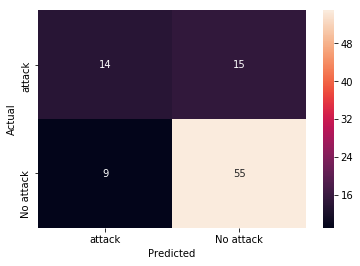

In [42]:
sn.heatmap(
    cm_tree_v1, 
    fmt = "0.0f", 
    xticklabels=["attack", "No attack"], 
    yticklabels=["attack", "No attack"], 
    annot= True
)
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [64]:
y_tree_v1 = pd.DataFrame({'actual': y_test, 'predicted': y_tree_pred_v1})
y_tree_v1['probability'] = tree_v1.predict_proba(x_test)[:,1]

In [65]:
FP_COST = 1.0
FN_COST = 5.0
def get_cost(cutoff):
    y_tree_v1['new_predict'] = y_tree_v1.probability.map(lambda x: 1 if x > cutoff else 0)
    cm = confusion_matrix(y_tree_v1.actual, y_tree_v1.new_predict, [1,0])
    cost = FN_COST * cm[0][1] + FP_COST * cm[1][0]
    return cost

import numpy as np
cut_off_list = np.arange(0.1,0.8,0.01)
cost_list = [get_cost(x) for x in cut_off_list]
cost_df = pd.DataFrame({'cost': cost_list, 'cut_off': cut_off_list})

In [80]:
sorted_cost = cost_df.sort_values('cost', ascending=True)
cut_off_df = sorted_cost[sorted_cost.cost == sorted_cost.cost[0]]
cut_off_df
cut_off = cut_off_df.sort_values('cut_off', ascending=True)
cut_off

,cost,cut_off
0,55.0,0.10
1,55.0,0.11
2,55.0,0.12
3,55.0,0.13
4,55.0,0.14
5,55.0,0.15
6,55.0,0.16
7,55.0,0.17
8,55.0,0.18
9,55.0,0.19


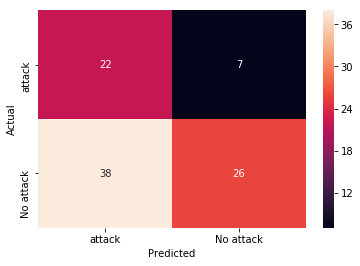

In [68]:
y_tree_v1['final_predict'] = y_tree_v1.probability.map(lambda x: 1 if x > 0.10 else 0)
cm_final = confusion_matrix(y_tree_v1.actual, y_tree_v1.final_predict, [1,0])
sn.heatmap(
    cm_final, 
    fmt = "0.0f", 
    xticklabels=["attack", "No attack"], 
    yticklabels=["attack", "No attack"], 
    annot= True
)
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_tree_v1.actual, y_tree_v1.final_predict))

              precision    recall  f1-score   support

           0       0.79      0.41      0.54        64
           1       0.37      0.76      0.49        29

   micro avg       0.52      0.52      0.52        93
   macro avg       0.58      0.58      0.52        93
weighted avg       0.66      0.52      0.52        93



In [27]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [89]:
classifiers = [
    KNeighborsClassifier(10),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

In [90]:
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

KNeighborsClassifier
****Results****
0.1


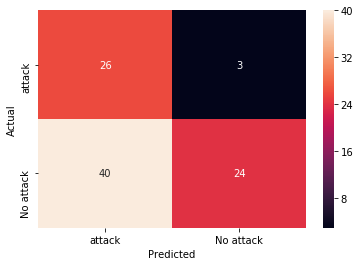

              precision    recall  f1-score   support

           0       0.89      0.38      0.53        64
           1       0.39      0.90      0.55        29

   micro avg       0.54      0.54      0.54        93
   macro avg       0.64      0.64      0.54        93
weighted avg       0.73      0.54      0.53        93

DecisionTreeClassifier
****Results****
0.1


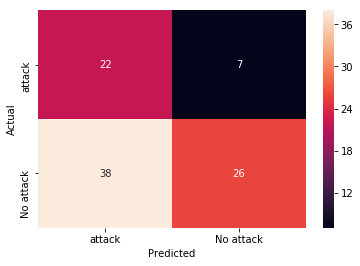

              precision    recall  f1-score   support

           0       0.79      0.41      0.54        64
           1       0.37      0.76      0.49        29

   micro avg       0.52      0.52      0.52        93
   macro avg       0.58      0.58      0.52        93
weighted avg       0.66      0.52      0.52        93

RandomForestClassifier
****Results****
0.1


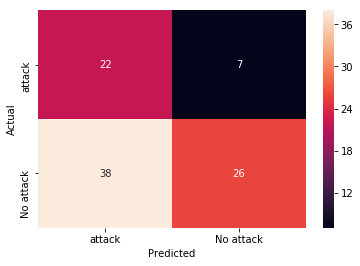

              precision    recall  f1-score   support

           0       0.79      0.41      0.54        64
           1       0.37      0.76      0.49        29

   micro avg       0.52      0.52      0.52        93
   macro avg       0.58      0.58      0.52        93
weighted avg       0.66      0.52      0.52        93

AdaBoostClassifier
****Results****
0.1


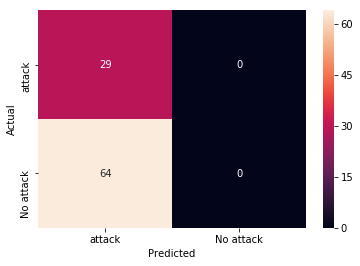

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        64
           1       0.31      1.00      0.48        29

   micro avg       0.31      0.31      0.31        93
   macro avg       0.16      0.50      0.24        93
weighted avg       0.10      0.31      0.15        93

GradientBoostingClassifier
****Results****
0.1


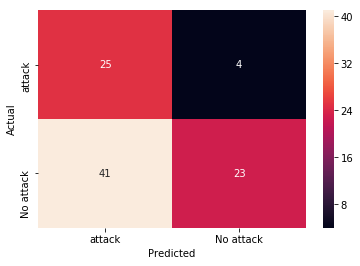

              precision    recall  f1-score   support

           0       0.85      0.36      0.51        64
           1       0.38      0.86      0.53        29

   micro avg       0.52      0.52      0.52        93
   macro avg       0.62      0.61      0.52        93
weighted avg       0.70      0.52      0.51        93

GaussianNB
****Results****
0.1


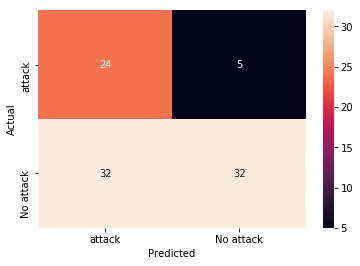

              precision    recall  f1-score   support

           0       0.86      0.50      0.63        64
           1       0.43      0.83      0.56        29

   micro avg       0.60      0.60      0.60        93
   macro avg       0.65      0.66      0.60        93
weighted avg       0.73      0.60      0.61        93

LinearDiscriminantAnalysis
****Results****
0.1


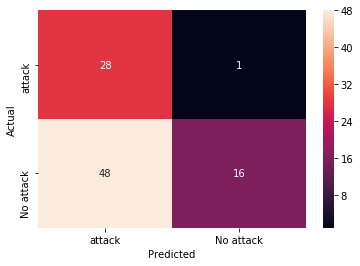

              precision    recall  f1-score   support

           0       0.94      0.25      0.40        64
           1       0.37      0.97      0.53        29

   micro avg       0.47      0.47      0.47        93
   macro avg       0.65      0.61      0.46        93
weighted avg       0.76      0.47      0.44        93

QuadraticDiscriminantAnalysis
****Results****
0.1


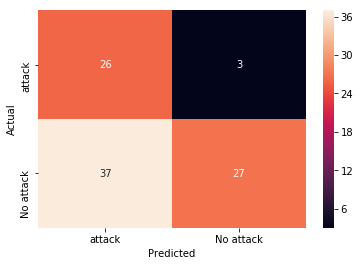

              precision    recall  f1-score   support

           0       0.90      0.42      0.57        64
           1       0.41      0.90      0.57        29

   micro avg       0.57      0.57      0.57        93
   macro avg       0.66      0.66      0.57        93
weighted avg       0.75      0.57      0.57        93



In [101]:
FP_COST = 1.0
FN_COST = 5.0
cut_off_list = np.arange(0.1,0.8,0.01)

def get_cost(cutoff, prob_df):
    prob_df['new_predict'] = prob_df.probability.map(lambda x: 1 if x > cutoff else 0)
    cm = confusion_matrix(prob_df.actual, prob_df.new_predict, [1,0])
    cost = FN_COST * cm[0][1] + FP_COST * cm[1][0]
    return cost

for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    y_pred = clf.predict(x_test)
    prob_df = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
    prob_df['probability'] = clf.predict_proba(x_test)[:,1]
    cost_list = [get_cost(x, prob_df) for x in cut_off_list]
    cost_df = pd.DataFrame({'cost': cost_list, 'cut_off': cut_off_list})
    
    sorted_cost = cost_df.sort_values('cost', ascending=True)
    cut_off_df = sorted_cost[sorted_cost.cost == sorted_cost.cost[0]]
    cut_off = cut_off_df.sort_values('cut_off', ascending=True).cut_off[0]
    print(cut_off)

    
    prob_df['final_predict'] = prob_df.probability.map(lambda x: 1 if x > cut_off else 0)
    cm_final = confusion_matrix(prob_df.actual, prob_df.final_predict, [1,0])
    sn.heatmap(
        cm_final,
        fmt = "0.0f", 
        xticklabels=["attack", "No attack"], 
        yticklabels=["attack", "No attack"], 
        annot= True
    )
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print(classification_report(prob_df.actual, prob_df.final_predict))
    
    
print("="*30)